# Project Title: Exploratory Data Analysis (EDA) with Real-World Datasets

**Objective:** The objective of this project is to perform Exploratory Data Analysis (EDA) on a real-world dataset using NumPy, Pandas, Matplotlib, and Seaborn. You will analyze and visualize the data to gain insights and make data-driven decisions.

**Dataset:** Select a real-world dataset related to a specific domain (e.g., finance, healthcare, social media, sports) that is relevant and interesting to you. Ensure that the dataset is large enough to allow for meaningful analysis. Before initiating your project, obtain approval for the selected dataset from your professor. If your chosen dataset proves too complex for an individual effort, collaboration in teams of up to two students is permissible.

**Dataset Selection:** Here are some reputable platforms where you can explore and download datasets across various domains:


1.   **Kaggle:** https://www.kaggle.com/datasets
2.   **UCI Machine Learning Repository:** https://archive.ics.uci.edu/
3.   **Data.gov:** https://data.gov/
4.   **Google Dataset Search:** https://datasetsearch.research.google.com/
5.   **AWS Public Datasets:** https://registry.opendata.aws/
6.   **Open Data Portal:** https://data.europa.eu/en
7.   **World Bank Data:** https://data.worldbank.org/
8.   **Reddit Datasets:** https://www.reddit.com/r/datasets/

**Tasks:**



1.   **Data Loading and Inspection:**

  *   Load the dataset into a Pandas DataFrame
  *   Display basic information about the dataset (e.g., number of rows, columns, data types).
  *   Check for missing values and handle them appropriately.

2.   **Data Cleaning:**

  *   Clean the dataset by handling any inconsistencies, outliers, or errors in the data.
  *   Perform data type conversions if necessary.

3.   **Descriptive Statistics:**

  *   Compute basic descriptive statistics (mean, median, mode, standard deviation, etc.) for numerical columns.
  *   Explore the distribution of data using histograms and box plots.

4.   **Data Visualization:**

  *   Create visualizations to explore relationships between variables.
  *   Utilize Matplotlib and Seaborn to generate meaningful plots such as scatter plots, bar charts, and heatmaps.
  *   Include appropriate labels and titles in the visualizations.

5.   **Correlation Analysis:**

  *   Calculate and visualize the correlation between different variables.
  *   Discuss the findings and any insights gained from the correlation analysis.

6.   **Time Series Analysis (if applicable):**

  *   If the dataset involves time-series data, perform time-series analysis.
  *   Plot time-series data and analyze trends, seasonality, or any other patterns.

7.   **Conclusion and Insights:**

  *   Summarize the key findings and insights obtained from the analysis in the Jupyter Notebook.
  *   Discuss any challenges encountered during the analysis and how they were addressed.
  *   Provide recommendations or suggestions for further analysis.


Data Loading/Inspection

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a Pandas DataFrame
schoolData = pd.read_csv("/content/sample_data/student_math_clean.csv")

In [ ]:
# Display basic information about the dataset
print("Number of rows, columns:", schoolData.shape)
print("\nData types:")
print(schoolData.dtypes)
print("\nBasic information:")
print(schoolData.info())

Number of rows, columns: (395, 34)

Data types:
student_id                int64
school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                  

In [ ]:
# Check for missing values
print("\nMissing values:")
print(schoolData.isnull().sum())



Missing values:
student_id               0
school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64


Data Manipulation/Cleaning

In [ ]:
# Function that checks if grades are passing or not
def passStatus(x): # X is final grade. Checks if they passed or failed (by Portugese standards)
  if x < 10:
    return "Fail"
  if x >= 10:
    return "Pass"

In [ ]:
# Converts student's weekday and weekend alcohol ratings to a average and applies to a new column
schoolData["average_alcohol"] = (schoolData["weekday_alcohol"] + schoolData["weekend_alcohol"])/2
# Checks if grades are passing or not and converts it into a new column.
schoolData["pass_status"] = schoolData["final_grade"].apply(passStatus)

# Drops unnecessary data
# Student ID has no correlation here.
schoolData.drop(columns="student_id",inplace=True)
# Schools have too big a size difference to compare
schoolData.drop(columns="school",inplace=True)
# Guardians, while useful, is not used in the data exploration.
schoolData.drop(columns="guardian",inplace=True)
# Reason is not relevant
schoolData.drop(columns="school_choice_reason",inplace=True)



schoolData.head()

,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,travel_time,...,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade,average_alcohol,pass_status
0,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,teacher,15 to 30 min.,...,4,1,1,3,6,5,6,6,1.0,Fail
1,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,<15 min.,...,3,1,1,3,4,5,5,6,1.0,Fail
2,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,<15 min.,...,2,2,3,3,10,7,8,10,2.5,Pass
3,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,services,<15 min.,...,2,1,1,5,2,15,14,15,1.0,Pass
4,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,other,<15 min.,...,2,1,2,5,4,6,10,10,1.5,Pass


Descriptive Statistics

In [ ]:
# Handle missing values (if any)
# For example, you can drop rows with missing values: df.dropna(inplace=True)

# Data Cleaning
# Handle any inconsistencies, outliers, or errors
# Perform data type conversions if necessary

# Descriptive Statistics
# Compute basic descriptive statistics for numerical columns
print("\nDescriptive statistics:")
print(schoolData.describe())


Descriptive statistics:
              age  class_failures  family_relationship   free_time  \
count  395.000000      395.000000           395.000000  395.000000   
mean    16.696203        0.334177             3.944304    3.235443   
std      1.276043        0.743651             0.896659    0.998862   
min     15.000000        0.000000             1.000000    1.000000   
25%     16.000000        0.000000             4.000000    3.000000   
50%     17.000000        0.000000             4.000000    3.000000   
75%     18.000000        0.000000             5.000000    4.000000   
max     22.000000        3.000000             5.000000    5.000000   

           social  weekday_alcohol  weekend_alcohol      health    absences  \
count  395.000000       395.000000       395.000000  395.000000  395.000000   
mean     3.108861         1.481013         2.291139    3.554430    5.708861   
std      1.113278         0.890741         1.287897    1.390303    8.003096   
min      1.000000         1.

Data Visualization

Text(0, 0.5, 'Number of Passes')

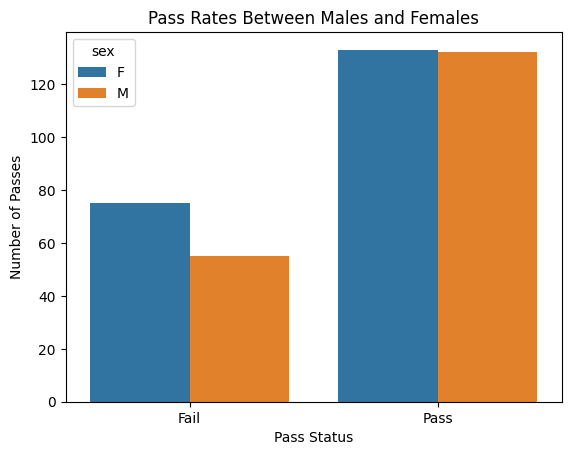

In [ ]:
sns.countplot(x = "pass_status", data = schoolData, hue = "sex") # shows how many students passed and failed and between male and female
plt.title('Pass Rates Between Males and Females')
plt.xlabel('Pass Status')
plt.ylabel('Number of Passes')

Text(0, 0.5, 'Number of Passes')

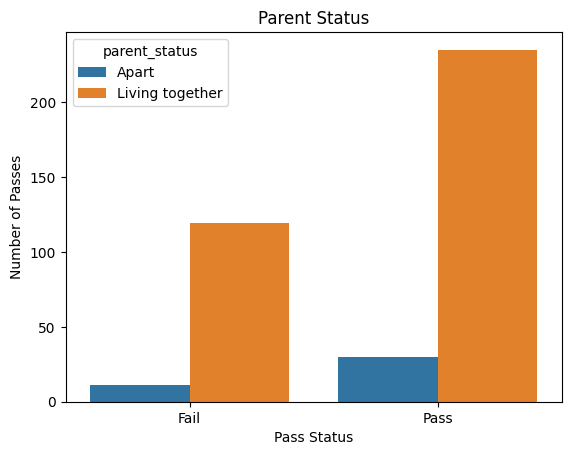

In [ ]:
sns.countplot(x = "pass_status", data = schoolData, hue = "parent_status") # Creates a count plot with parent status as the hue.
plt.title('Parent Status')
plt.xlabel('Pass Status')
plt.ylabel('Number of Passes')

Text(0, 0.5, 'Number of Passes')

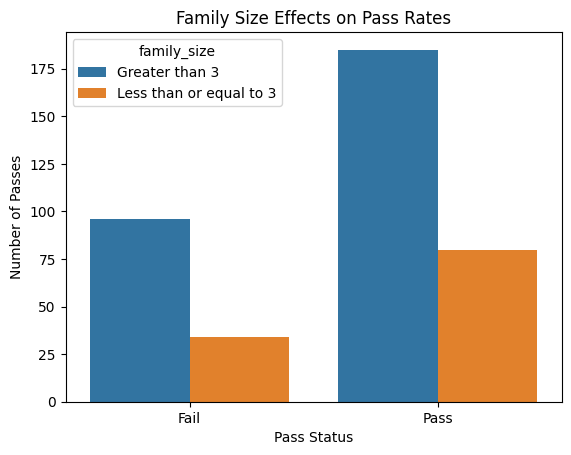

In [ ]:
sns.countplot(x = "pass_status", data = schoolData, hue = "family_size") # Creates a count plot with family size as the hue.
plt.title('Family Size Effects on Pass Rates')
plt.xlabel('Pass Status')
plt.ylabel('Number of Passes')

Text(0, 0.5, 'Number of Passes')

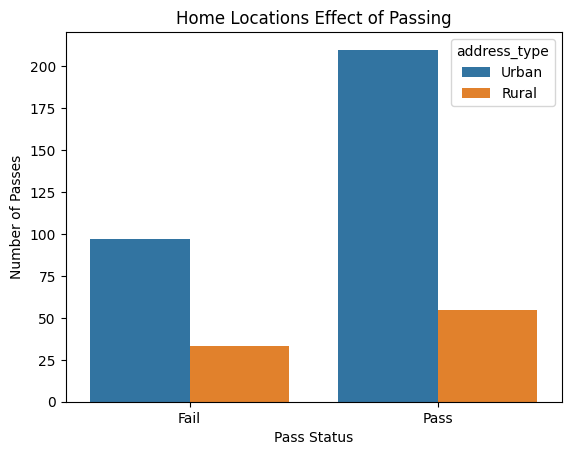

In [ ]:
sns.countplot(x = "pass_status", data = schoolData, hue = "address_type") # Creates a count plot with house location as the hue.
plt.title('Home Locations Effect of Passing')
plt.xlabel('Pass Status')
plt.ylabel('Number of Passes')

In [ ]:
sns.scatterplot(data = schoolData, x = "final_grade", y = "absences", hue = 'sex')
plt.title('Absences Effects on Grades')
plt.xlabel('Final Grades')
plt.ylabel('Absences')

In [ ]:
sns.countplot(x = "pass_status", data = schoolData, hue = 'mother_education') # Creates a count plot with mother education as the hue.
plt.title('Effects of Mothers Eductions')
plt.xlabel('Pass Status')
plt.ylabel('Number of Passes')


In [ ]:
sns.countplot(x = "pass_status", data = schoolData, hue = 'father_education') # Creates a count plot with father education as the hue.
plt.title('Effects of Fathers Eductions')
plt.xlabel('Pass Status')
plt.ylabel('Number of Passes')

In [ ]:
sns.countplot(data = schoolData, x = 'pass_status', hue = 'internet_access' ) # Creates a count plot with internet as the hue.
plt.title('Internets Effect on Pass Rates')
plt.xlabel('Pass Status')
plt.ylabel('Number of Passes')

In [ ]:
sns.catplot(data = schoolData,kind = 'bar', x = "social", y = "average_alcohol", hue = 'pass_status')
plt.title('Social Behaviors Effect on Drinking Alcohol and Grades')
plt.ylabel('Average Alcohol')
plt.xlabel('Social')

In [ ]:
sns.countplot(data = schoolData, x = 'pass_status', hue = 'study_time' )
plt.title('Studyings Effect on Passing')
plt.xlabel('Pass Status')
plt.ylabel('Number of Passes')